In [10]:
import os 
import sys
import glob
import time
from tqdm import tqdm

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import MDAnalysis as mda
from MDAnalysis.analysis import distances
from MDAnalysis.analysis.rms import RMSD

In [3]:
runs = sorted(glob.glob("../../../traj_save/nsp10_16_dist_rna*/*.pdb"))

In [8]:
df = []

for run in runs:
    pdb_file = run
    dcd_file = run.replace("pdb", "dcd")
    ref_pdb = pdb_file[:-7] + '000.pdb'
#     print(ref_pdb)
#     continue

    run_base = os.path.basename(run)[:-4]
    run_label = run_base.split("_")[2]
    
    mda_traj = mda.Universe(pdb_file, dcd_file)
    ref_traj = mda.Universe(ref_pdb)
    
    rmsd_inst = RMSD(mda_traj, ref_traj,
        select='protein and name CA',
        groupselections=[
                "protein and name CA and segid B",   # CORE
                "protein and name CA and segid A",                                   # LID
                ],
        verbose=1)
    rmsd_inst.run()
        
    df.append({'sys_name': run_base,
               'time_frame': rmsd_inst.rmsd[:,1],
               'rmsd_all': rmsd_inst.rmsd[:,2], 
               'rmsd_nsp10': rmsd_inst.rmsd[:,3], 
               'rmsd_nsp16': rmsd_inst.rmsd[:,4]})

In [11]:
df = pd.DataFrame(df)
df.head()

,sys_name,time_frame,rmsd_all,rmsd_nsp10,rmsd_nsp16
0,comp_rna7jyy_000,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0004985873554006036, 1.0616907007445464, 1....","[0.0004952299888172041, 1.460294182969237, 1.4...","[0.0005000130728990803, 0.8585929951396252, 0...."
1,comp_rna7jyy_004,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[1.3695555613687405, 1.480131365432595, 1.5297...","[1.8181422288471192, 1.9283271587964739, 2.199...","[1.1493111085450876, 1.2641674945781078, 1.170..."
2,comp_rna7jyy_008,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[1.2373058877211058, 1.4063774973719831, 1.411...","[1.624648223017924, 1.6369747747701853, 1.3383...","[1.0492141998942193, 1.3059983804249915, 1.439..."
3,comp_rna7jyy_012,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[1.3123956859878205, 1.405181743847398, 1.4607...","[1.7546303012430093, 1.7714604098056441, 2.075...","[1.0936981611327554, 1.234151813408522, 1.1355..."
4,comp_rna7jyy_016,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[1.3328777379438976, 1.4559113174408533, 1.432...","[1.7531811202843883, 1.9322360976582933, 1.975...","[1.128427139078195, 1.2221152992203321, 1.1554..."


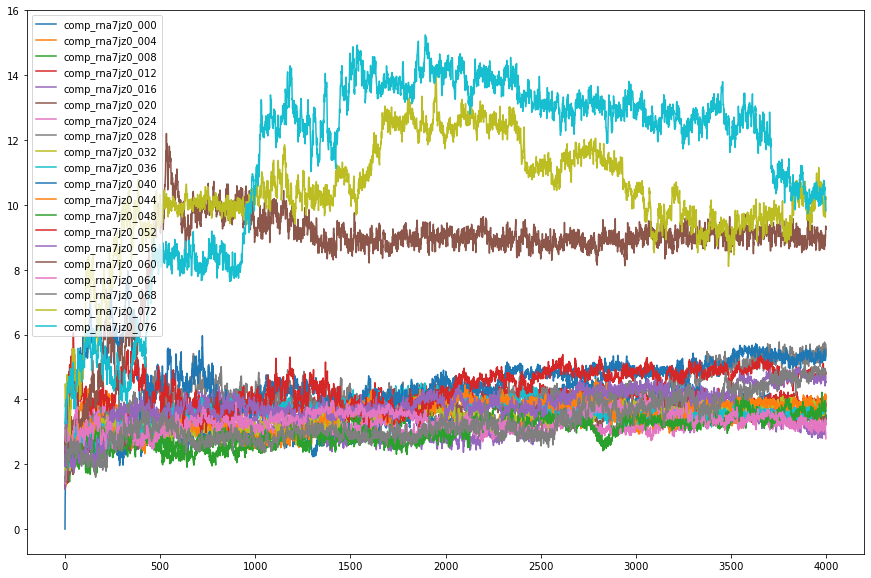

In [13]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for i, row in df.iterrows(): 
    if '7jz0' in row['sys_name']: 
        ax.plot(row['rmsd_all'], label=row['sys_name']) 
plt.legend()
# plt.savefig('dist.pdf')

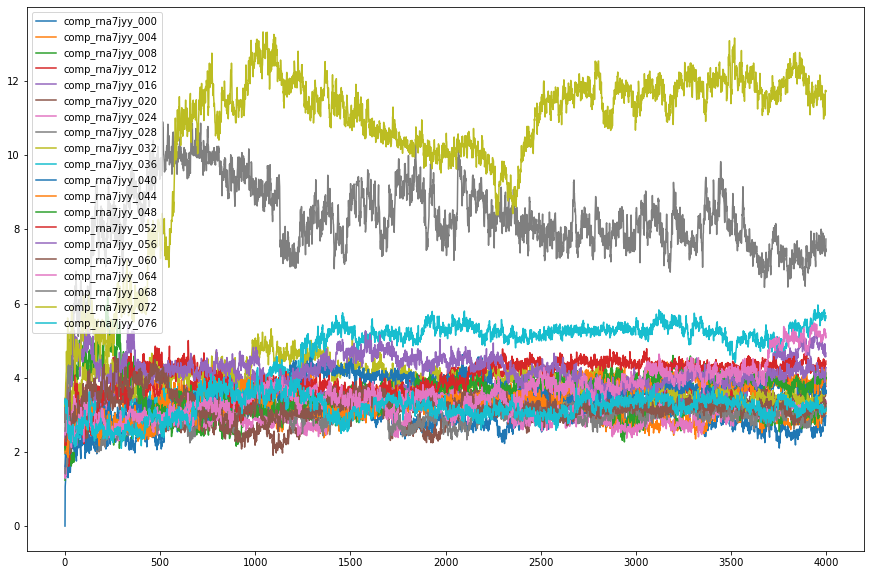

In [14]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for i, row in df.iterrows(): 
    if '7jyy' in row['sys_name']: 
        ax.plot(row['rmsd_all'], label=row['sys_name']) 
plt.legend()

In [ ]:
%run ~/.matplotlib.py